<a href="https://colab.research.google.com/github/Chandu106/Bit_predict/blob/main/Bitpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ab467864-fb29-3f8f-79f0-9d76df1106c0)


# **Get Data**

In [3]:
# Download Bitcoin historical data from GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-08-23 10:42:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2023-08-23 10:42:30 (11.7 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [4]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
len(df)

2787

In [7]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


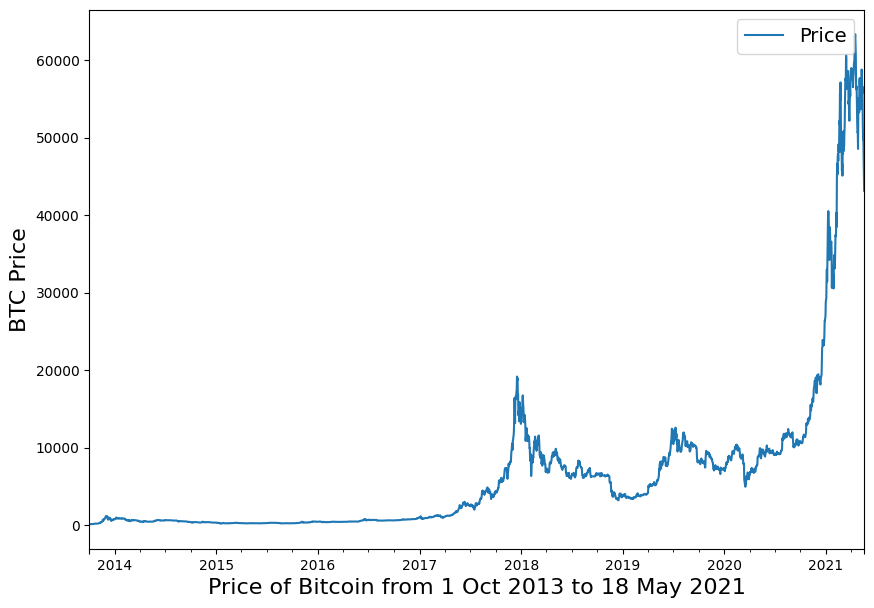

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price", fontsize=16)
plt.xlabel("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

*Importing time series data with python csv module*

In [9]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))# get the dates as dates (not strings), strptime = string parse time
        btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0, 0.5, 'BTC Price')

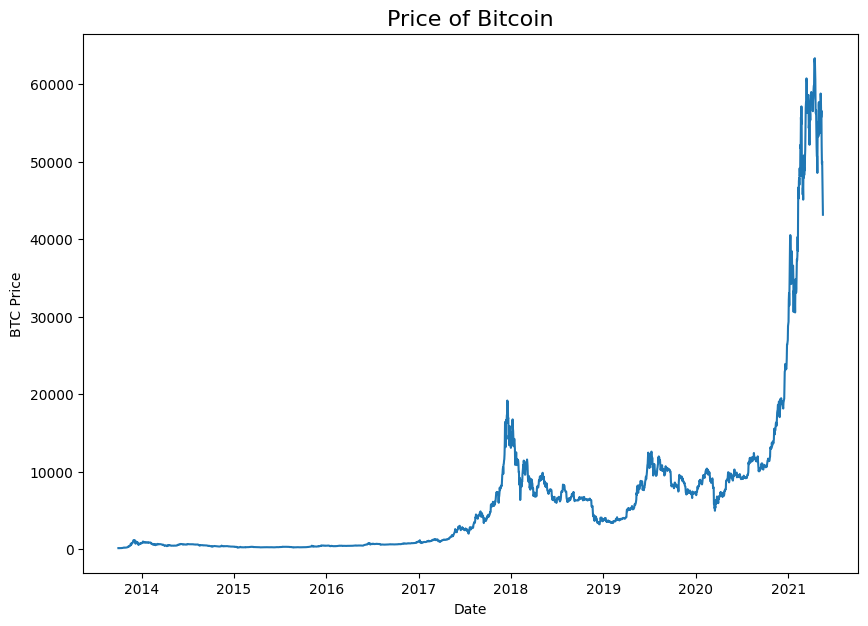

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price")

# **Format Data Part 1: Creating train and test datasets**

*Creating training and testing datasplits in a wrong way*

In [11]:
time_steps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [12]:
time_steps[:5], prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(time_steps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

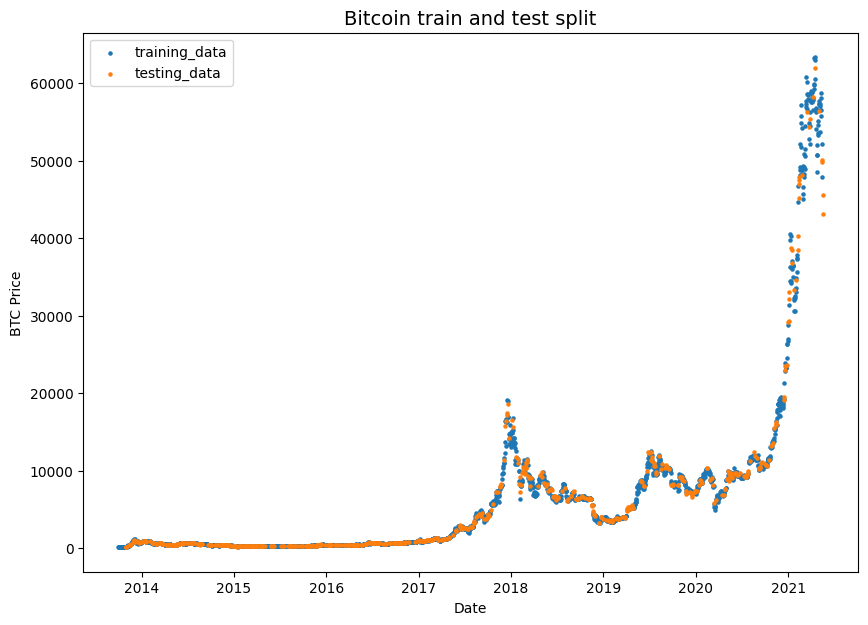

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="training_data")
plt.scatter(X_test, y_test , s=5, label="testing_data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Bitcoin train and test split", fontsize=14)
plt.legend()
plt.show();


*Creating training and testing datasplits in right way*

In [15]:
split_size = int(0.8 * len(prices))
X_train, y_train, = time_steps[:split_size], prices[:split_size]
X_test, y_test = time_steps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

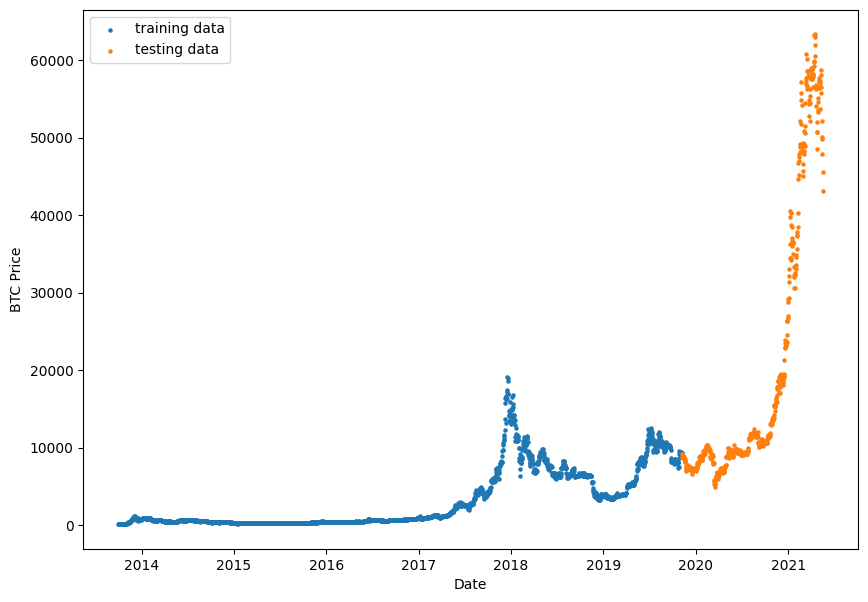

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="training data")
plt.scatter(X_test, y_test, s=5, label="testing data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend()
plt.show();

*Creating a plotting function*

In [17]:
def plot_time_series(time_steps, values, format=".", start=0, end=None, label=None):
    plt.plot(time_steps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    plt.legend(fontsize=14)
    plt.grid(True)

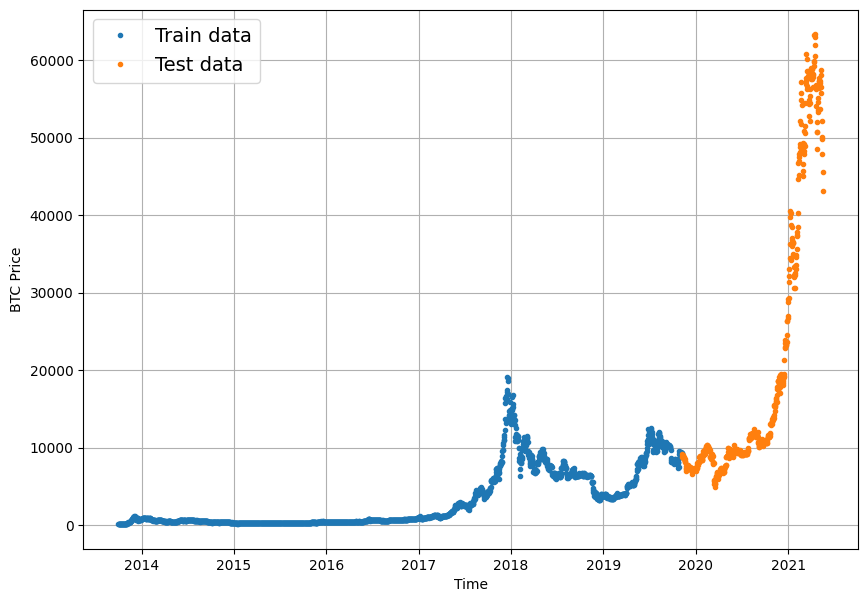

In [18]:
plt.figure(figsize=(10,7))
plot_time_series(time_steps=X_train, values=y_train, label="Train data")
plot_time_series(time_steps=X_test, values=y_test, label="Test data")

# **Model-0 : Naive forecast(baseline)**

In [19]:
naive_forecast = y_test[:-1] #naive forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] #view first 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

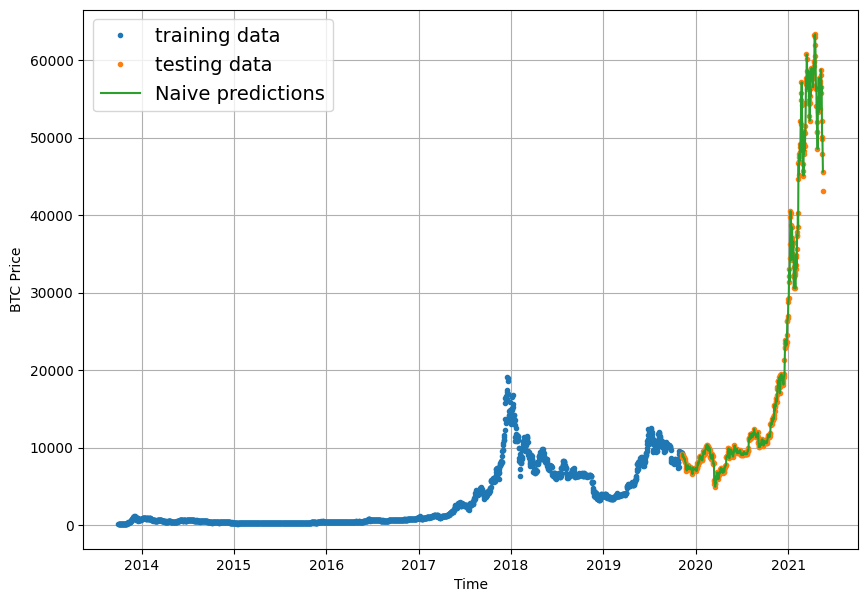

In [20]:
plt.figure(figsize=(10,7))
plot_time_series(time_steps = X_train, values = y_train, label = "training data")
plot_time_series(time_steps = X_test, values = y_test, label = "testing data")
plot_time_series(time_steps = X_test[1:], values = naive_forecast,format = "-",label = "Naive predictions")

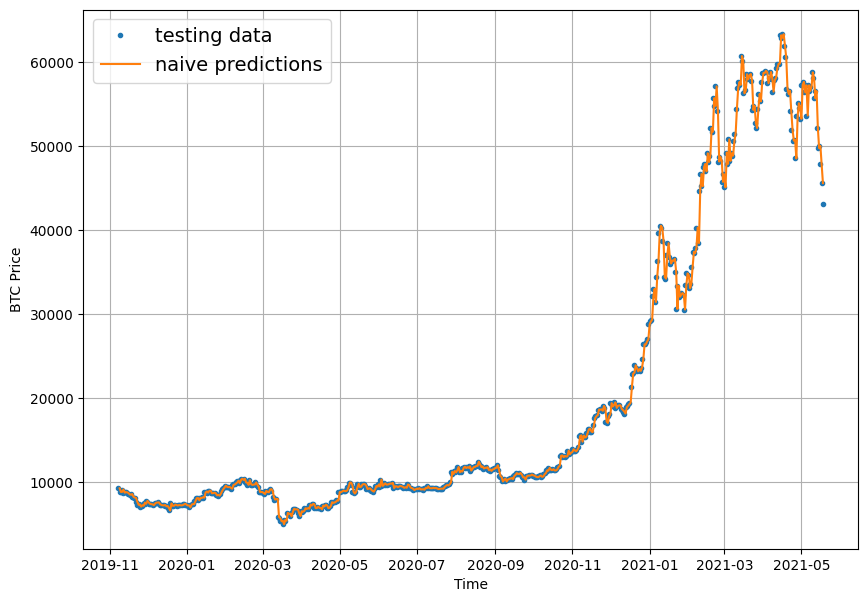

In [21]:
plt.figure(figsize=(10,7))
plot_time_series(time_steps = X_test, values = y_test, label = "testing data")
plot_time_series(time_steps = X_test[1:], format = "-", values = naive_forecast, label = "naive predictions")

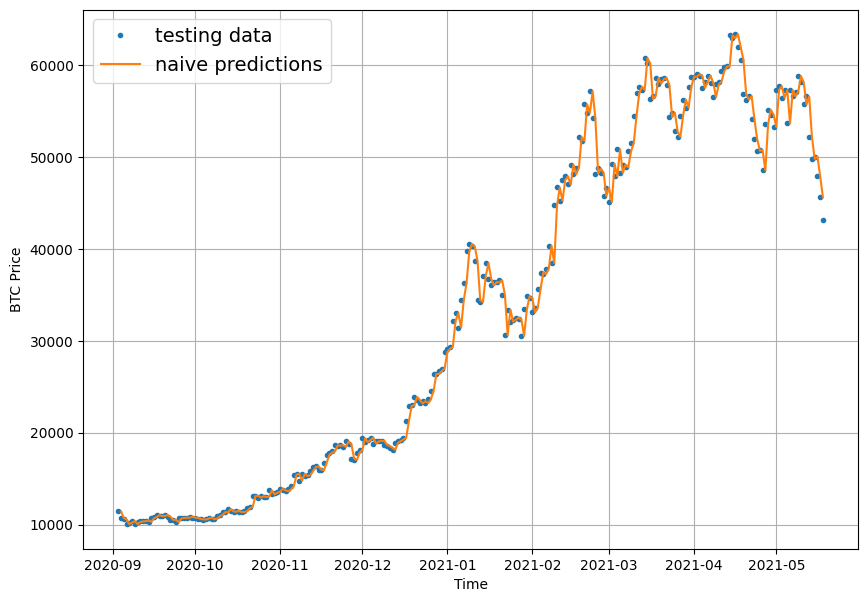

In [22]:
plt.figure(figsize=(10,7))
offset = 300
plot_time_series(time_steps = X_test, values = y_test, start = offset, label = "testing data")
plot_time_series(time_steps = X_test[1:], format = "-", values = naive_forecast, start = offset, label = "naive predictions")

In [23]:
import tensorflow as tf

In [24]:
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true, y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_pred[:-1]))
    return mae / mae_naive_no_season

In [25]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [26]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 24.464115}

In [27]:
tf.reduce_mean(y_test).numpy()

20056.632963737222

# **Formating Data Part 2: Windowing dataset**

In [28]:
HORIZON = 1
WINDOW_SIZE = 7

In [29]:
def get_labelled_windows(x, horizon=1):
    return x[:,:-horizon], x[:,-horizon:]

In [30]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")


Window: [1 2 3 4 5 6 7] -> Label: 8


In [31]:
# creating function to view numpy arrays as windows

def make_windows(x, window_size=7, horizon=1):

    #1 creating a window of the window size and add the horizon at the end of the array for later labelling
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    #2 create a 2d array with multiple window steps (minus1 to count 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T

    #3 Index on the target array(time_series)
    windowed_array = x[window_indexes]

    #4 get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels


In [32]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [33]:
for i in range(3):
    print(full_windows[i], full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] [125.96116]


# **Turning windows into training and testing sets**

In [34]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [35]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

# **Making a Modelling Checkpoint**

In [36]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file


In [37]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

# **Model-01: Dense Model (window = 7, horizon = 1)**

In [38]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model


Epoch 1/100
18/18 [==============================] - 6s 69ms/step - loss: 1484.4020 - mae: 1484.4020 - val_loss: 2398.8699 - val_mae: 2398.8699
Epoch 2/100
18/18 [==============================] - 1s 31ms/step - loss: 370.1060 - mae: 370.1060 - val_loss: 1864.2227 - val_mae: 1864.2227
Epoch 3/100
18/18 [==============================] - 1s 30ms/step - loss: 214.6336 - mae: 214.6336 - val_loss: 1321.9933 - val_mae: 1321.9933
Epoch 4/100
18/18 [==============================] - 0s 28ms/step - loss: 180.6739 - mae: 180.6739 - val_loss: 1024.9269 - val_mae: 1024.9269
Epoch 5/100
18/18 [==============================] - 0s 28ms/step - loss: 173.1658 - mae: 173.1658 - val_loss: 962.4829 - val_mae: 962.4829
Epoch 6/100
18/18 [==============================] - 1s 41ms/step - loss: 171.4612 - mae: 171.4612 - val_loss: 942.9020 - val_mae: 942.9020
Epoch 7/100
18/18 [==============================] - 0s 28ms/step - loss: 165.8545 - mae: 165.8545 - val_loss: 924.6363 - val_mae: 924.6362
Epoch 8/10

In [39]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 586.6714 - mae: 586.6714


[586.6714477539062, 586.6714477539062]

In [40]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.5845 - mae: 568.5845


[568.5845336914062, 568.5845336914062]

In [41]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [42]:
model_1_preds = make_preds(model_1, test_windows)

18/18 [==============================] - 0s 2ms/step


In [43]:
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8839.0625, 8763.772 , 9011.427 , 8764.305 , 8703.313 , 8706.754 ,
       8666.114 , 8512.677 , 8425.589 , 8511.606 ], dtype=float32)>

In [44]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'mae': 568.5845,
 'mse': 1173518.6,
 'rmse': 1083.2906,
 'mape': 2.5458899,
 'mase': 24.161198}

In [45]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 24.464115}

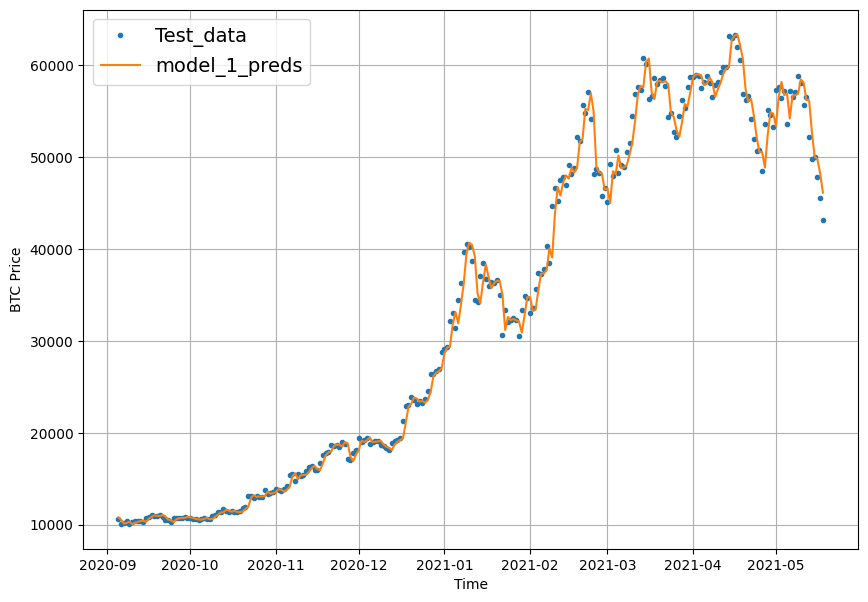

In [46]:
offset = 300
plt.figure(figsize=(10,7))

plot_time_series(time_steps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(time_steps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

# **Model 2: Dense (Window: 30, horizon: 1)**

In [47]:
HORIZON = 1
WINDOW_SIZE = 30

In [48]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [49]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [50]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [51]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 629.0532


629.05322265625

In [52]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 617.6182


617.6181640625

In [53]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [54]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 617.61816,
 'mse': 1320019.8,
 'rmse': 1148.9211,
 'mape': 2.802664,
 'mase': 23.366032}

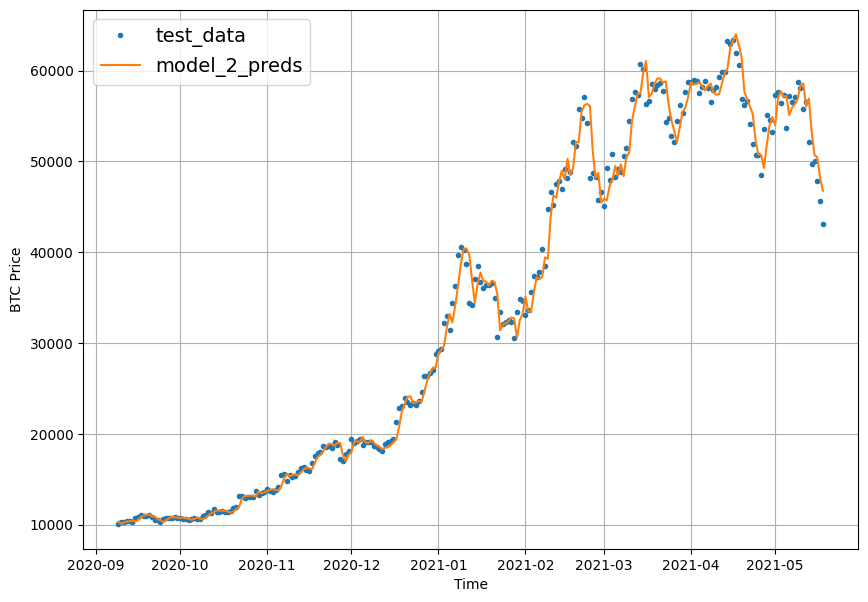

In [55]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(time_steps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(time_steps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

# **Model 3: Dense (Window=30, Horizon=7)**

In [56]:
HORIZON = 7
WINDOW_SIZE = 30
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [57]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [58]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
],name = "model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [59]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1250.9749


1250.974853515625

In [60]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1232.1274


1232.12744140625

In [61]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9444.054, 9355.032, 9368.049, 9282.391, 9472.985, 9452.072,
        9529.631],
       [9029.085, 9133.273, 8964.642, 8856.704, 9108.299, 9177.136,
        9153.031],
       [8834.266, 9011.592, 8681.669, 8753.198, 8991.975, 9220.07 ,
        9002.18 ],
       [8897.632, 9097.74 , 8993.497, 8822.185, 9100.925, 9381.486,
        9083.483],
       [8754.994, 8982.552, 8882.419, 8944.498, 9033.497, 9042.063,
        8873.774]], dtype=float32)>

In [62]:
model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds)
model_3_results

{'mae': array([ 621.6727  ,  309.05426 ,  316.74707 ,  427.25516 ,  377.88004 ,
         545.598   ,  601.3266  ,  509.89584 ,  443.25217 ,  481.77756 ,
         779.98846 ,  823.8365  ,  859.6688  ,  936.2338  ,  604.83014 ,
         176.32693 ,  248.69029 ,  345.23138 ,  282.0512  ,  312.05078 ,
         150.91483 ,  182.67117 ,  289.3079  ,  293.23773 ,  158.83238 ,
         132.96394 ,  186.301   ,  153.74721 ,  125.81927 ,  217.55211 ,
         297.10574 ,  404.33398 ,  366.45578 ,  365.2685  ,  263.39948 ,
         233.40569 ,  331.92746 ,  284.08078 ,  234.6769  ,  186.07883 ,
         470.81396 ,  123.38337 ,  106.57143 ,   59.08224 ,  144.56787 ,
         117.70536 ,   60.095913,   99.8524  ,  138.52818 ,  145.14879 ,
         106.70445 ,  103.38497 ,  279.51617 ,  202.35135 ,  234.28215 ,
         322.82764 ,  559.866   ,  532.18835 ,  494.6397  ,  522.2231  ,
         318.21735 ,  197.78879 ,  258.3037  ,  365.14725 ,  407.12088 ,
         452.7119  ,  531.8383  ,  526.5727 

In [63]:
tf.squeeze(test_labels).shape , tf.squeeze(model_3_preds).shape

(TensorShape([551, 7]), TensorShape([551, 7]))

In [64]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': array([ 621.6727  ,  309.05426 ,  316.74707 ,  427.25516 ,  377.88004 ,
         545.598   ,  601.3266  ,  509.89584 ,  443.25217 ,  481.77756 ,
         779.98846 ,  823.8365  ,  859.6688  ,  936.2338  ,  604.83014 ,
         176.32693 ,  248.69029 ,  345.23138 ,  282.0512  ,  312.05078 ,
         150.91483 ,  182.67117 ,  289.3079  ,  293.23773 ,  158.83238 ,
         132.96394 ,  186.301   ,  153.74721 ,  125.81927 ,  217.55211 ,
         297.10574 ,  404.33398 ,  366.45578 ,  365.2685  ,  263.39948 ,
         233.40569 ,  331.92746 ,  284.08078 ,  234.6769  ,  186.07883 ,
         470.81396 ,  123.38337 ,  106.57143 ,   59.08224 ,  144.56787 ,
         117.70536 ,   60.095913,   99.8524  ,  138.52818 ,  145.14879 ,
         106.70445 ,  103.38497 ,  279.51617 ,  202.35135 ,  234.28215 ,
         322.82764 ,  559.866   ,  532.18835 ,  494.6397  ,  522.2231  ,
         318.21735 ,  197.78879 ,  258.3037  ,  365.14725 ,  407.12088 ,
         452.7119  ,  531.8383  ,  526.5727 

# **Making our evaluation function work for larger horizon**

In [65]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    if mae.ndim>0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [66]:
model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1232.1273,
 'mse': 5340607.0,
 'rmse': 1418.4115,
 'mape': 5.5293307,
 'mase': 14.342403}

In [67]:
X_test

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000',
       '2019-11-18T00:00:00.000000000', '2019-11-19T00:00:00.000000000',
       '2019-11-20T00:00:00.000000000', '2019-11-21T00:00:00.000000000',
       '2019-11-22T00:00:00.000000000', '2019-11-23T00:00:00.000000000',
       '2019-11-24T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-11-26T00:00:00.000000000', '2019-11-27T00:00:00.000000000',
       '2019-11-28T00:00:00.000000000', '2019-11-29T00:00:00.000000000',
       '2019-11-30T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-02T00:00:00.000000000', '2019-12-03T00:00:00.000000000',
       '2019-12-04T00:00:00.000000000', '2019-12-05

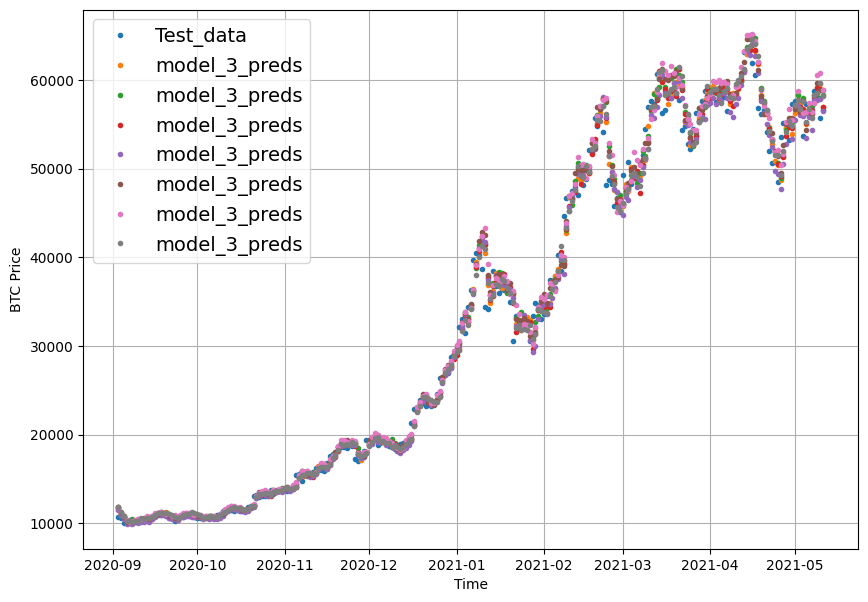

In [68]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(time_steps=X_test[:len(test_windows)], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(time_steps=X_test[:len(test_windows)], values=model_3_preds, start=offset, label="model_3_preds")


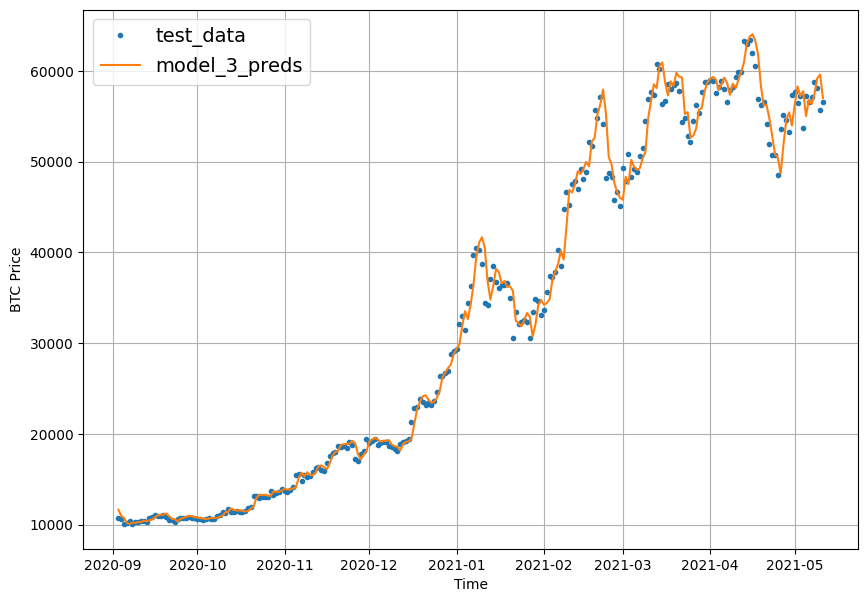

In [69]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(time_steps=X_test[:len(test_windows)],
                 values=test_labels[:,0],
                 start=offset,
                 label="test_data")
plot_time_series(time_steps=X_test[:len(test_windows)],
                 values=model_3_preds[:,0],
                 format="-",
                 start=offset,
                 label="model_3_preds")

In [70]:
len(test_windows)

551

In [71]:
X_test[:len(test_windows)].shape, test_labels[:,0].shape, model_3_preds[:,0].shape

((551,), (551,), TensorShape([551]))

In [72]:
tf.reduce_mean(model_3_preds, axis=1).shape

TensorShape([551])

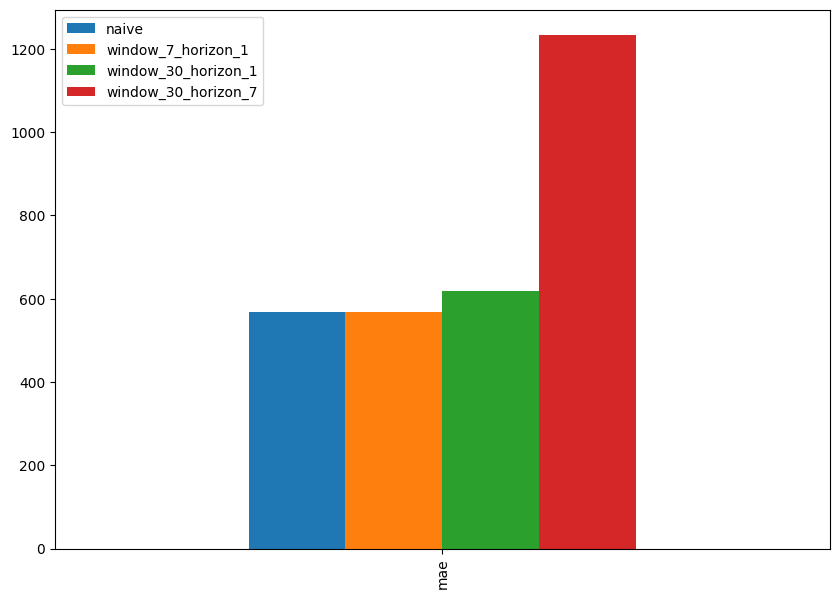

In [73]:
pd.DataFrame({"naive": naive_results["mae"],
             "window_7_horizon_1": model_1_results["mae"],
             "window_30_horizon_1":model_2_results["mae"],
             "window_30_horizon_7":model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

# **Model 4: Conv1D**

In [74]:
HORIZON = 1
WINDOW_SIZE = 7

In [75]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [76]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [77]:
train_windows[0].shape

(7,)

In [78]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
expand_dims_layer(x).shape , train_windows[0].shape

(TensorShape([7, 1]), (7,))

In [79]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [80]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 566.5834


566.5834350585938

In [82]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]


18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8898.6045, 8806.967 , 9010.208 , 8799.358 , 8771.9   , 8735.309 ,
       8698.475 , 8552.948 , 8471.592 , 8531.871 ], dtype=float32)>

In [83]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results


{'mae': 566.58344,
 'mse': 1173330.1,
 'rmse': 1083.2036,
 'mape': 2.5452073,
 'mase': 24.251617}

In [84]:
tf.random.set_seed(42)

# Create model
model_4a = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=512, kernel_size=3, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4a_conv1D")

# Compile model
model_4a.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4a.fit(train_windows,
            train_labels,
            batch_size=512,
            epochs=1000,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4a.name)])

In [85]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4a = tf.keras.models.load_model("model_experiments/model_4a_conv1D")
model_4a.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 563.2745


563.2745361328125

In [86]:
# Make predictions
model_4a_preds = make_preds(model_4a, test_windows)
model_4a_preds[:10]


18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8848.892, 8777.721, 9046.529, 8784.082, 8741.497, 8751.066,
       8679.569, 8525.595, 8463.728, 8534.392], dtype=float32)>

In [87]:
model_4a_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4a_preds)
model_4a_results


{'mae': 563.27454,
 'mse': 1151338.9,
 'rmse': 1073.0046,
 'mape': 2.5117693,
 'mase': 24.482824}

In [88]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 24.464115}

# **Model 5: RNN (LSTM)**

In [89]:
train_windows[0].shape, WINDOW_SIZE

((7,), 7)

In [90]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(256, activation="relu", return_sequences=True)(x)
x = layers.LSTM(128, activation = "relu")(x)
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, output, name = "model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [91]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.0379


567.0379028320312

In [92]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8864.246 , 8778.402 , 9021.214 , 8774.98  , 8747.619 , 8745.482 ,
       8681.486 , 8532.313 , 8459.789 , 8528.3955], dtype=float32)>

In [93]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 567.0379,
 'mse': 1166190.5,
 'rmse': 1079.903,
 'mape': 2.558011,
 'mase': 24.364674}

# **Make a Multivariate Time Series Data**

In [95]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [96]:
block_reward_1 = 50
block_reward_2 = 25 # 28 nov 2012
block_reward_3 = 12.5 # 9 jul 2016
block_reward_4 = 6.25 # 11 may 2020

block_reward_2_datatime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [100]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [101]:
bitcoin_prices_block = bitcoin_prices.copy()

In [103]:
bitcoin_prices_block.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [125]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [126]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


In [127]:
bitcoin_prices_block.block_reward[1500:1550]

Date
2017-11-09    12.5
2017-11-10    12.5
2017-11-11    12.5
2017-11-12    12.5
2017-11-13    12.5
2017-11-14    12.5
2017-11-15    12.5
2017-11-16    12.5
2017-11-17    12.5
2017-11-18    12.5
2017-11-19    12.5
2017-11-20    12.5
2017-11-21    12.5
2017-11-22    12.5
2017-11-23    12.5
2017-11-24    12.5
2017-11-25    12.5
2017-11-26    12.5
2017-11-27    12.5
2017-11-28    12.5
2017-11-29    12.5
2017-11-30    12.5
2017-12-01    12.5
2017-12-02    12.5
2017-12-03    12.5
2017-12-04    12.5
2017-12-05    12.5
2017-12-06    12.5
2017-12-07    12.5
2017-12-08    12.5
2017-12-09    12.5
2017-12-10    12.5
2017-12-11    12.5
2017-12-12    12.5
2017-12-13    12.5
2017-12-14    12.5
2017-12-15    12.5
2017-12-16    12.5
2017-12-17    12.5
2017-12-18    12.5
2017-12-19    12.5
2017-12-20    12.5
2017-12-21    12.5
2017-12-22    12.5
2017-12-23    12.5
2017-12-24    12.5
2017-12-25    12.5
2017-12-26    12.5
2017-12-27    12.5
2017-12-28    12.5
Name: block_reward, dtype: object

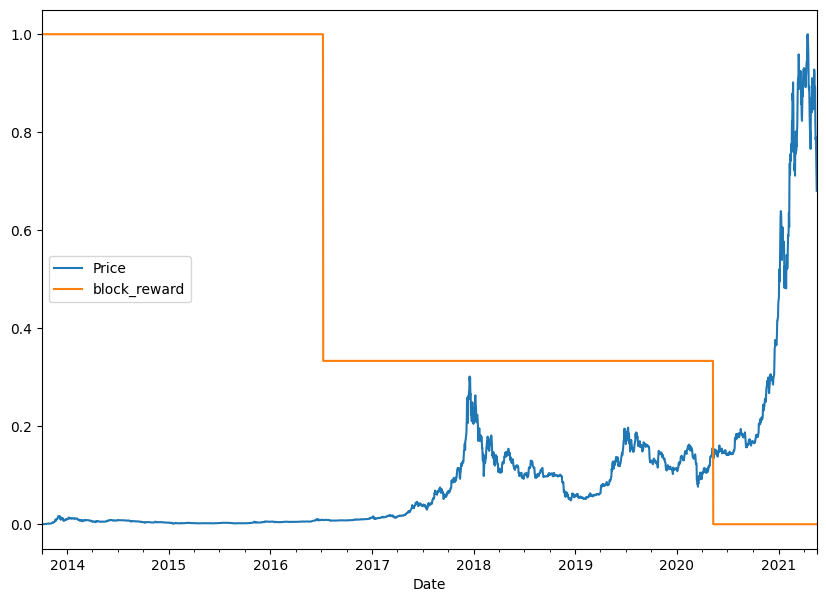

In [130]:
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));


# **Making a windowed dataset with pandas**

In [131]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [132]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [133]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [135]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)


(2224, 556, 2224, 556)

In [136]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [137]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)


18/18 [==============================] - 0s 2ms/step - loss: 569.4417


569.441650390625

In [138]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8825.728, 8780.085, 9042.86 , 8735.678, 8721.409, 8736.954,
       8649.814, 8529.418, 8437.737, 8528.449], dtype=float32)>

In [139]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 569.44165,
 'mse': 1176016.4,
 'rmse': 1084.4429,
 'mape': 2.555507,
 'mase': 24.326565}